### Кластерный анализ

***Кластеризация (кластерный анализ)*** – это процедура, предназначенная для разбиения совокупности объектов на однородные группы, называемые **кластерами**.   
В результате кластеризации внутри каждой группы (кластера) должны оказаться «похожие» объекты, а объекты из разных кластеров должны находиться как можно дальше друг от друга.  

Кластеризация является описательной процедурой, которая дает возможность провести разведочный анализ и изучить «структуру данных». Таким образом, можно сказать, что цель кластеризации заключается в поиске существующих структур в данных.  

Задача кластеризации сходна с задачей классификации, ее отличие состоит в том, что количество классов (кластеров) заранее не предопределено. Для решения задач кластеризации используется обучение без учителя.

![img](https://i.stack.imgur.com/3rAvW.jpg)

К настоящему времени существует большое количество методов кластерного анализа, использующих различные подходы. Применяя к одним и тем же данным различные методы, аналитик может получить различные решения. Это считается нормальным явлением.  

https://scikit-learn.org/stable/modules/clustering.html  

Полученные  при кластеризации результаты требуют дальнейшей интерпретации, исследования и изучения свойств и характеристик объектов для возможности точного описания сформированных кластеров.   

Не существует общепринятой классификации методов кластерного анализа. Часто, методы кластеризации делят на две группы:   
• иерархические методы  
• неиерархические методы


#### Иерархический кластерный анализ

Суть иерархической кластеризации состоит в последовательном объединении меньших кластеров в большие или разделении больших кластеров на меньшие.  
- Агломеративные методы: новые кластеры создаются путем объединения более мелких кластеров.
- Дивизимные методы: новые кластеры создаются путем деления более крупных кластеров на более мелкие.

##### Рассмотрим, как происходит объединение меньших кластеров в большие.  

Шаг 0. Каждое наблюдение – отдельный кластер.  
Шаг 1. Два соседних кластера объединяются в один и т.д.  
Этот процесс продолжается до тех пор, пока все объекты не будут объединены в один кластер. 

**Иерархический кластерный анализ работает всегда!**

А в чем заключается работа аналитика?

Аналитик:
1. Осуществляет отбор переменных.  
2. Определяет метод стандартизации, если это необходимо.  
3. Определяет каким методом вычислять расстояние между кластерами.  
4. Определяет каким методом вычислять расстояние между объектами.  
5. Интерпретирует результат.  


#### Пример
Торговая компания провела опрос с целью выявить, какие напитки предпочитают респонденты. Опрошенные указывали, какие напитки из предложенного списка они пьют регулярно. В списке присутствовали: Coca-Cola, диетическая Coca-Cola, Pepsi-Cola, диетическая Pepsi-Cola, 7-Up, диетический 7-Up, Sprite, минеральная вода. Результаты опроса представлены в файле «beverage_r.csv». Опрос проводился с целью выявление у групп потребителей сравнительно однородных потребностей, что является важным фактором при расстановке товара на витрины.


Используйте иерархический кластерный анализ, чтобы сегментировать (разделить на группы по предпочтениям) потребителей. Проинтерпретируйте полученный результат.


In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [3]:
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


Иерархический кластерный анализ реализован в библиотеке SciPy https://www.scipy.org/.  
В модуле https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy.

В Sklearn тоже есть: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Вычисления производятся функцией ```linkage```(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage).   
Аргументы функции: 
  - таблица данных, 
  - метод вычисления расстояний между кластерами (```ward```, ```single```, ```complete```, ```average```),
  - метод вычисления расстояний между объектами (```euclidean``` (default), ```cityblock``` ( Manhattan), ```hamming```, ```cosine```).

##### Как вычисляется расстояние между объектами?  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist  
Расстояние между объектами определяет их «похожесть».

<a href="https://ibb.co/dP68sF4"><img src="https://i.ibb.co/R3PRGfT/2.jpg" alt="2" border="0"></a>

##### Как вычисляется расстояние между кластерами?  

<a href="https://ibb.co/Xpnd2N3"><img src="https://i.ibb.co/2PzLnms/4.jpg" alt="4" border="0"></a>

Метод Варда: В качестве расстояния между кластерами берется прирост суммы квадратов расстояний объектов до центров кластеров, получаемый в результате их объединения.

##### Как определить сколько кластеров?

**Дендрограмма** – это визуализатор, используемый для представления результатов
иерархической кластеризации. Она показывает степень близости отдельных объектов
и кластеров, а также наглядно демонстрирует в графическом виде последовательность
их объединения. Количество уровней дендрограммы соответствует
числу шагов слияния или разделения кластеров.

<a href="https://ibb.co/y5Qrq15"><img src="https://i.ibb.co/827H9p2/8.jpg" alt="8" border="0"></a>

<a href="https://ibb.co/cQ26vKZ"><img src="https://i.ibb.co/DQw9bPv/6.jpg" alt="6" border="0"></a>

In [4]:
# Импортируем необходимые функции
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

Объект ```link``` представляет собой матрицу ```(n-1) x 4```, где ```n``` - число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` - размер нового кластера.

In [5]:
link[:5]

array([[ 5., 10.,  0.,  2.],
       [ 1.,  2.,  0.,  2.],
       [ 4., 35.,  0.,  3.],
       [ 3., 22.,  0.,  2.],
       [20., 36.,  0.,  4.]])

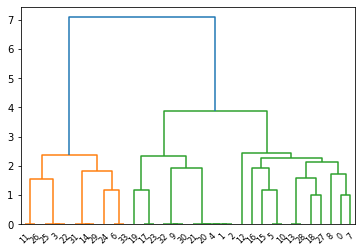

In [6]:
# Функция для построения дендрограммы
dn = dendrogram(link)

**На самом деле здесь 3 кластера!**

Добавим к данным колонку ```cluster```, в которую запишем номер кластера, в которую попал объект. Это сделаем с помощью функции ```fcluster```. В качестве первого аргумента передаём объект ```linkage```, полученный выше. Третьим аргументом ```criterion``` передаём критерий для разбиения на кластеры (```distance``` для остановки разбиения по расстоянию между кластерами и ```maxclust``` для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента ```criterion```.

In [7]:
df['cluster'] = fcluster(link, 3, criterion='distance')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [8]:
df.groupby('cluster').sum()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0,11,6,6,0,0,10,0
2,11,3,1,0,11,0,0,3
3,9,3,1,1,5,11,1,6


Что можно сказать о результатах кластеризации?